In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
# Formatação dos números
pd.options.display.float_format = '{:20,.2f}'.format

In [6]:
!pip install openpyxl

     -------------------------------------- 249.8/249.8 kB 1.7 MB/s eta 0:00:00
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
dataset = r'C:\Users\professor\Downloads\AdventureWorks.xlsx'
df = pd.read_excel(dataset)

In [10]:
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [11]:
df.shape


(904, 16)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Data Venda      904 non-null    datetime64[ns]
 1   Data Envio      904 non-null    datetime64[ns]
 2   ID Loja         904 non-null    int64         
 3   ID Produto      904 non-null    int64         
 4   ID Cliente      904 non-null    int64         
 5   No. Venda       904 non-null    object        
 6   Custo Unitário  904 non-null    float64       
 7   Preço Unitário  904 non-null    float64       
 8   Quantidade      904 non-null    int64         
 9   Valor Desconto  904 non-null    float64       
 10  Valor Venda     904 non-null    float64       
 11  Produto         904 non-null    object        
 12  Fabricante      904 non-null    object        
 13  Marca           904 non-null    object        
 14  Classe          904 non-null    object        
 15  Cor   

In [13]:
df.describe()

,ID Loja,ID Produto,ID Cliente,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda
count,904.00,904.00,904.00,904.00,904.00,904.00,904.00,904.00
mean,270.02,"1,225.24","19,029.09",272.01,742.53,62.95,689.12,"6,620.14"
std,50.96,706.70,96.43,129.77,368.59,148.95,822.36,"4,319.41"
min,199.00,366.00,"18,815.00",5.09,9.99,2.00,0.00,159.84
25%,199.00,384.00,"18,964.75",324.69,758.00,6.00,0.00,"3,920.00"
50%,306.00,"1,202.00","19,060.00",330.66,980.00,9.00,461.17,"5,798.70"
75%,307.00,"1,226.00","19,107.00",348.58,998.00,17.00,"1,005.08","7,986.00"
max,307.00,"2,497.00","19,145.00",348.58,999.00,"1,560.00","6,272.00","29,400.00"


In [15]:
df['Produto'].nunique()

9

In [23]:
qtde=df['Quantidade'].unique()
type(qtde)
sqtde=pd.Series(qtde)
sqtde.sort_values()

23       2
35       4
36       5
0        6
11       7
3        8
29       9
28      10
22      11
1       12
7       13
8       14
6       15
9       16
25      17
2       18
10      19
30      20
31      21
26      22
24      23
4       24
34      25
33      26
32      28
5       30
27      32
39      37
54      44
20      48
52      74
44      96
40     108
13     120
37     144
41     156
45     192
47     216
12     240
53     264
16     288
43     312
49     384
21     428
38     432
42     468
14     480
19     576
46     624
17     720
48     864
50     936
18    1152
51    1173
15    1440
55    1560
dtype: int64

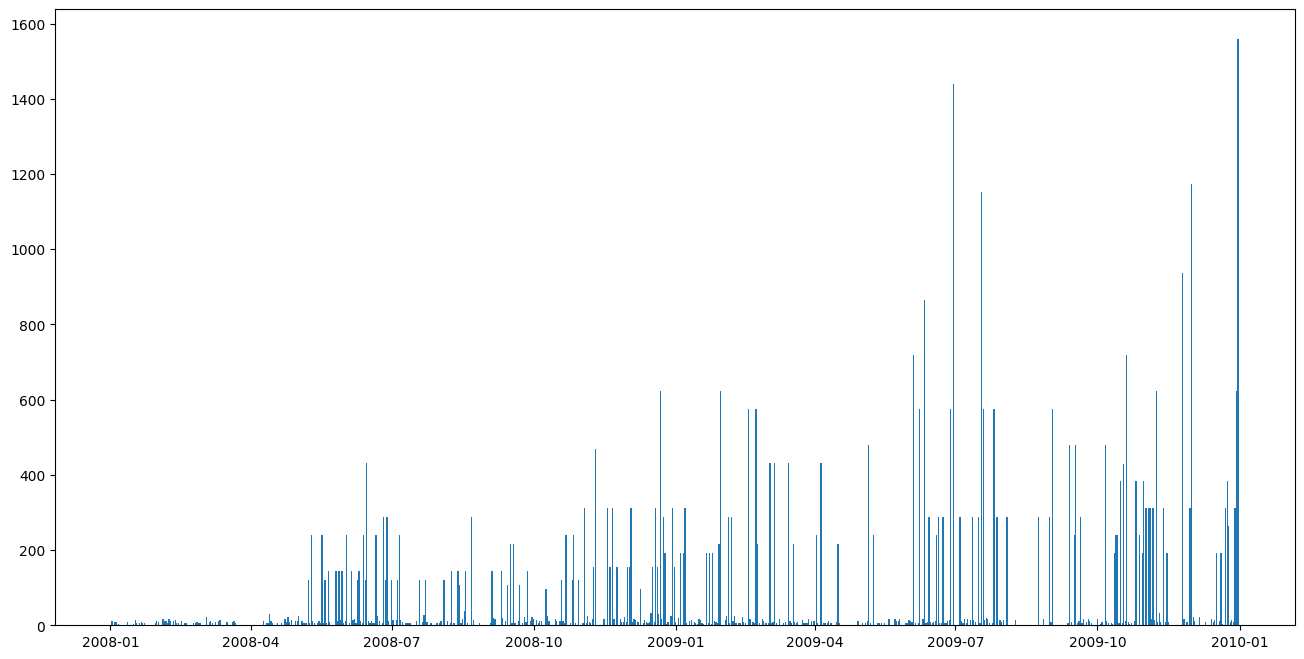

In [29]:
fig, ax = plt.subplots(figsize= (16,8))
#ax.plot(df['Data Venda'], df['Quantidade'])
ax.bar(df['Data Venda'], df['Quantidade'])
plt.show()

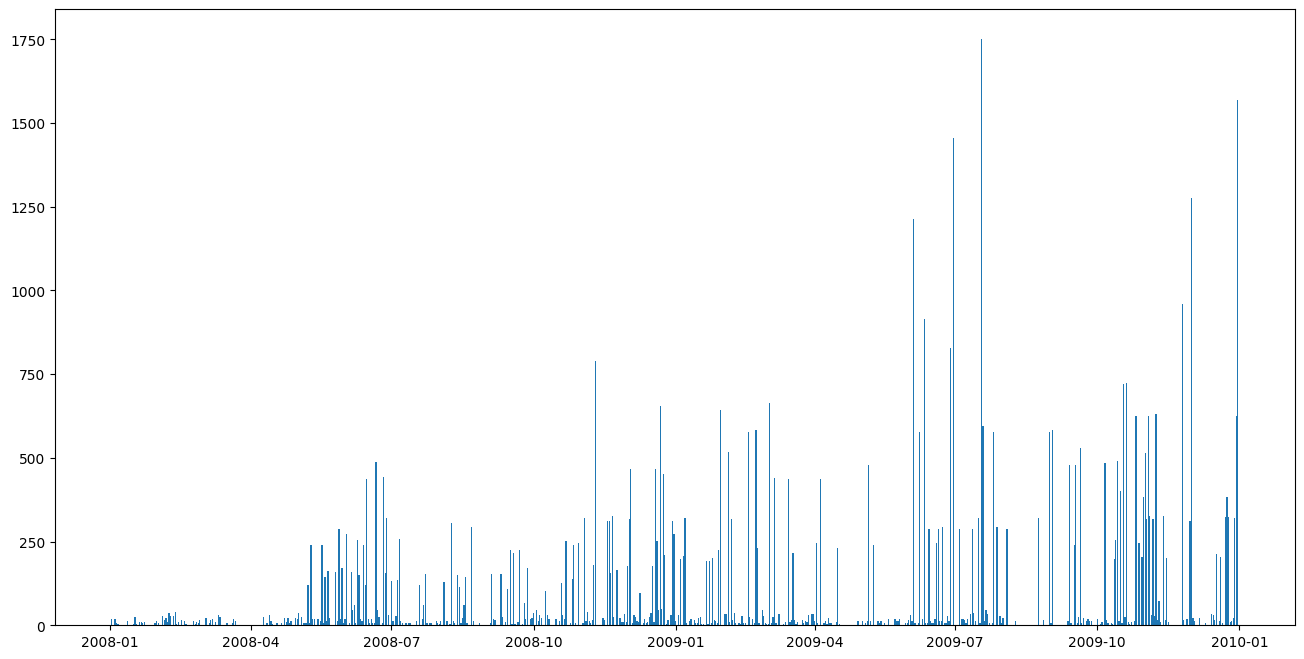

In [40]:
qtde_dia=df.groupby('Data Venda')['Quantidade'].sum()
fig, ax= plt.subplots(figsize=(16,8))
ax.bar(qtde_dia.index, qtde_dia.values)
plt.show()

In [49]:
df[['Data Venda','Preço Unitário', 'Quantidade','Valor Venda', 'Produto']]

,Data Venda,Preço Unitário,Quantidade,Valor Venda,Produto
0,2008-05-09,758.00,6,"4,548.00",Adventure Works Laptop15.4W M1548 Red
1,2008-05-12,758.00,6,"4,548.00",Adventure Works Laptop15.4W M1548 Red
2,2008-05-14,758.00,6,"4,548.00",Adventure Works Laptop15.4W M1548 Red
3,2008-05-21,758.00,6,"4,548.00",Adventure Works Laptop15.4W M1548 Red
4,2008-06-20,758.00,6,"4,548.00",Adventure Works Laptop15.4W M1548 Red
...,...,...,...,...,...
899,2008-03-22,999.00,6,"5,574.42",Fabrikam Trendsetter 1/3'' 8.5mm X200 Black
900,2008-10-04,980.00,6,"4,704.00",Fabrikam Trendsetter 2/3'' 17mm X100 Black
901,2008-12-11,980.00,6,"4,704.00",Fabrikam Trendsetter 2/3'' 17mm X100 Black
902,2008-12-17,999.00,6,"4,795.20",Fabrikam Trendsetter 1/3'' 8.5mm X200 Black


In [50]:
valor=df['Valor Venda'].sum()
print(f'O valor da receita total é R$ {valor:,.2f}')

O valor da receita total é R$ 5,984,606.14


In [55]:
df['Custo Total']= df['Custo Unitário'].mul(df['Quantidade'])
custo_total=df['Custo Total'].sum()
print(f'O custo total foi R$ {custo_total:,.2f}')


O custo total foi R$ 2,486,783.05


In [69]:
#receita_custo=[valor,custo_total]
#receita_custo
receita_custo={
    'Receita': valor,
    'Custo Total': custo_total
}


In [81]:
import matplotlib as mpl
mpl.__version__

'3.7.1'

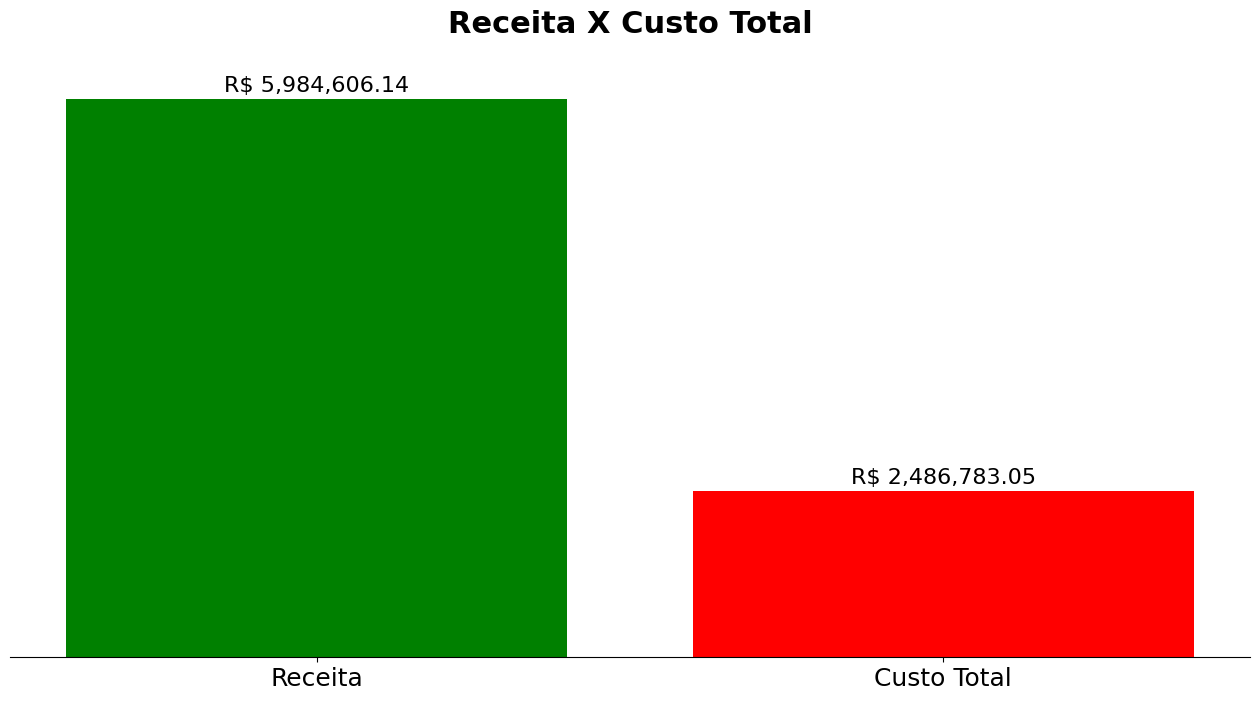

In [100]:
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(receita_custo.keys(),receita_custo.values(), color=['green', 'red'])
ax.set_title('Receita X Custo Total', fontsize=22, fontweight='bold')
ax.set_xticks(list(receita_custo.keys()))
ax.set_xticklabels(list(receita_custo.keys()), fontsize=18)
#ax.set_yticks([num for num in range(1_000_000, 7_000_000, 1_000_000)])
#ax.set_yticklabels([num for num in range(1_000_000, 7_000_000, 1_000_000)], fontsize=18)
ax.set_yticks([])
ax.set_ylim([1_000_000, 6_500_000])
ax.spines[['top','right','left']].set_visible(False)
for i in range(len(receita_custo)):
    ax.annotate(
        f'R$ {list(receita_custo.values())[i]:,.2f}',# o valor que quero escrever,
        (i, list(receita_custo.values())[i]),# coordenadas x e y
        ha='center',# alinhamento,
        xytext=(0,5),# posicionar o distanciamento,
        textcoords='offset points',# informo a partir de que ponto,
        fontsize = 16# fontsize
    )
plt.show()

In [88]:
len(receita_custo)

2

In [46]:
df.columns

Index(['Data Venda', 'Data Envio', 'ID Loja', 'ID Produto', 'ID Cliente',
       'No. Venda', 'Custo Unitário', 'Preço Unitário', 'Quantidade',
       'Valor Desconto', 'Valor Venda', 'Produto', 'Fabricante', 'Marca',
       'Classe', 'Cor'],
      dtype='object')

In [101]:
lucro = valor - custo_total
lucro

3497823.0926

In [104]:
receita_custo
lucro2 = receita_custo['Receita'] - receita_custo['Custo Total']
print(f'O lucro total foi R$ {lucro2:,.2f}')

O lucro total foi R$ 3,497,823.09


In [118]:
df['Tempo Envio']= df['Data Envio'].sub(df['Data Venda'])
#df['Tempo Envio'].describe()
df['Tempo Envio'] = df['Tempo Envio'].dt.days
df['Tempo Envio']

0      20
1       5
2       6
3       6
4       7
       ..
899    13
900    11
901     4
902     4
903     4
Name: Tempo Envio, Length: 904, dtype: int64

In [121]:
df.groupby(['Marca'])['Tempo Envio'].agg(['mean']) 
#df.groupby(['Marca'])['Tempo Envio'].mean() 

,mean
Marca,
Adventure Works,8.66
Contoso,8.47
Fabrikam,8.51


In [123]:
df.isna().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo Total       0
Tempo Envio       0
dtype: int64

In [127]:
df['Lucro Total']= df['Valor Venda'].sub(df['Preço Unitário'])

In [130]:
# df[['Custo Unitário', 'Quantidade', 'Custo Total', 'Preço Unitário', 'Quantidade', 'Valor Venda']]
df['Lucro Total'] = df['Valor Venda'].sub(df['Custo Total'])

In [135]:
df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro Total'].agg(['sum']) 

sum
Data Venda Marca                               
2008       Adventure Works           306,641.16
           Contoso                    56,416.00
           Fabrikam                1,557,020.55
2009       Adventure Works           405,395.08
           Contoso                   138,258.95
           Fabrikam                1,034,091.35

In [136]:
df.groupby(['Marca', df['Data Venda'].dt.year])['Lucro Total'].agg(['sum']) 

sum
Marca           Data Venda                     
Adventure Works 2008                 306,641.16
                2009                 405,395.08
Contoso         2008                  56,416.00
                2009                 138,258.95
Fabrikam        2008               1,557,020.55
                2009               1,034,091.35

In [146]:
df2 = df.groupby(['Marca', df['Data Venda'].dt.year])['Lucro Total'].agg(['sum']).reset_index()
df2
percent = df2['sum'][1] / df2['sum'][0] - 1
print(f'{percent:.2%}')

32.21%


In [133]:
a= f'Lucro do ano 2009 = R${df.loc[df["Data Venda"].dt.year==2009]["Lucro Total"].sum():_.2f}'
print(f'{a.translate(a.maketrans({".": ",", ",": "."}))}')

Lucro do ano 2009 = R$1_577_745,38


In [147]:
df['Quantidade'].sum()

56907

In [171]:
# df3=df.groupby(df['Produto'])['Quantidade'].agg(['sum']).sort_values(by='sum')
df3 = df.groupby(df['Produto'])['Quantidade'].sum().sort_values(ascending=True)
df3

Produto
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Black             1089
Headphone Adapter for Contoso Phone E130 White     25008
Headphone Adapter for Contoso Phone E130 Silver    25232
Name: Quantidade, dtype: int64

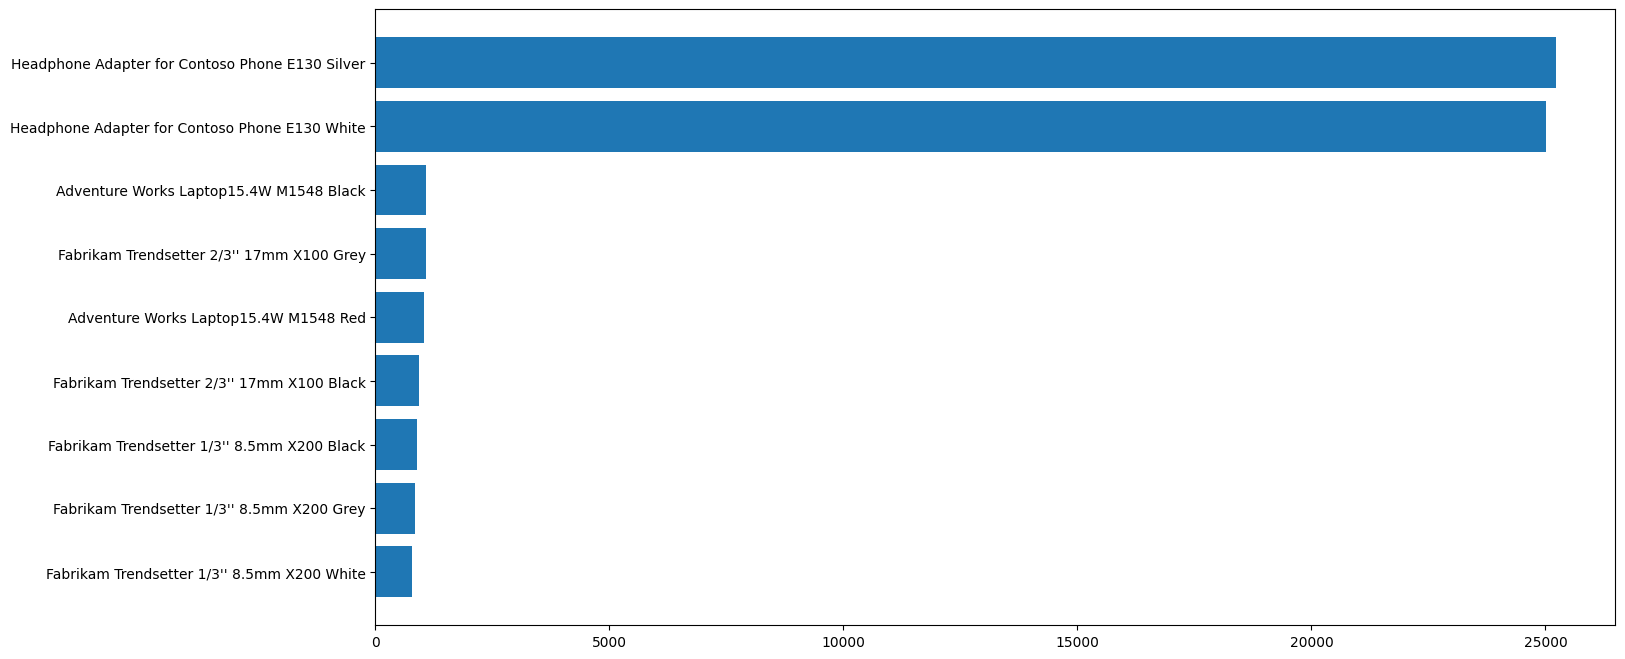

In [173]:
fig, ax = plt.subplots(figsize=(16,8))
ax.barh(df3.index, df3.values)
# ax.invert_yaxis()
plt.show()

In [175]:
!dir

 O volume na unidade C nÆo tem nome.
 O N£mero de S‚rie do Volume ‚ A278-2276

 Pasta de C:\Users\professor\rafael

04/03/2023  21:29    <DIR>          .
04/03/2023  21:29    <DIR>          ..
04/03/2023  21:29    <DIR>          .ipynb_checkpoints
21/01/2023  12:59             1.003 atividade01.py
04/03/2023  18:57    <DIR>          CLARA
04/03/2023  11:32                75 conn.py
04/03/2023  10:38    <DIR>          CRUD
04/03/2023  13:07             2.269 crud01.py
04/03/2023  15:17               178 ex01.py
04/03/2023  15:32               384 ex02.py
21/01/2023  11:29               687 exemplo01.py
04/03/2023  21:29           200.564 Notebook da Aula.ipynb
04/03/2023  18:40               261 sorteio.py
21/01/2023  13:15                84 teste.py
               9 arquivo(s)        205.505 bytes
               5 pasta(s)   29.196.242.944 bytes dispon¡veis
